## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [3]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("../data/howpop_train.csv")

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [6]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/195566/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [10]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [11]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку. Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* **март 2015**
* апрель 2015
* апрель 2016

In [12]:
df["month_of_year"] = [str(i)[:7] for i in df.published]
print(df.month_of_year.value_counts()[:10])
best_month = df.month_of_year.value_counts().index[0]
print(f"Month with most publications: {best_month}")

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
2015-11    2035
2015-10    2030
2015-06    2004
2015-09    1944
2016-04    1910
Name: month_of_year, dtype: int64
Month with most publications: 2015-03


## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины - Нет, не выделяются (если учитывать вариации по дням недели, конечно)
* На хабре _всегда_ больше статей, чем на гиктаймсе (нет, например, 21 марта 2015 на gt было больше)
* **По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей**

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

<AxesSubplot:xlabel='day', ylabel='count'>

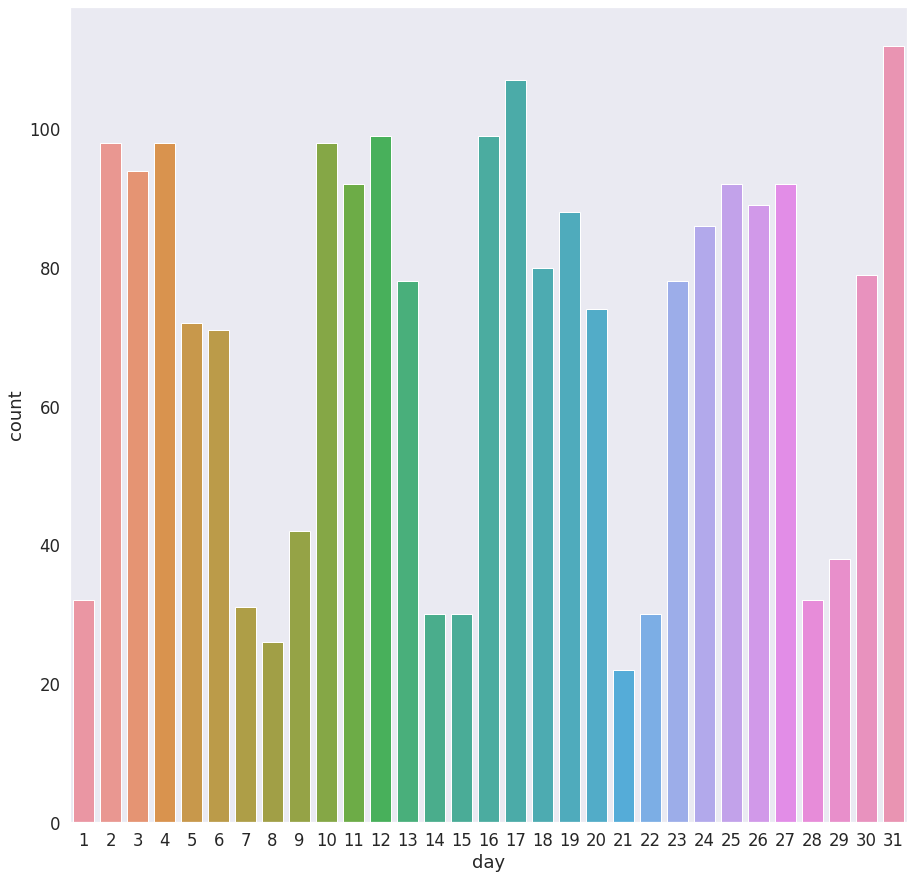

In [13]:
df_best_month = df[df.month_of_year == best_month]
df_best_month["day"] = [i.day for i in df_best_month.published]
plt.subplots(figsize=(15, 15))
sns.countplot(x = "day", data = df_best_month)

<AxesSubplot:xlabel='day', ylabel='count'>

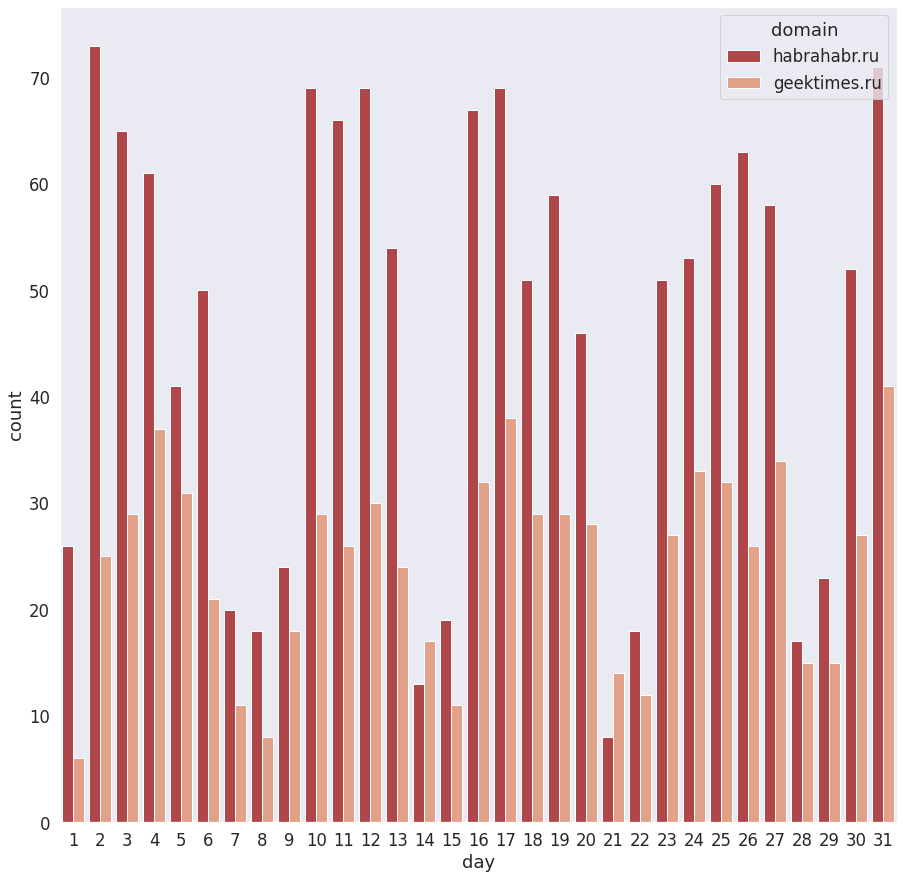

In [14]:
plt.subplots(figsize=(15, 15))
sns.countplot(x = "day", hue = "domain", data = df_best_month)

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

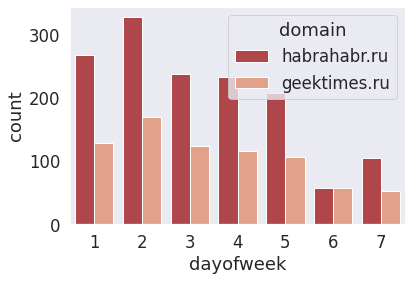

In [15]:
sns.countplot(x = "dayofweek", hue="domain", data = df_best_month)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - неверно
* У опубликованных в 10 утра постов больше всего комментариев - нет, наоборот, меньше всего
* **Больше всего просмотров набирают статьи, опубликованные в 6 часов утра**
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - неверно
* На хабре дневные статьи комментируют чаще, чем вечерние - неверно

Text(0.5, 1.0, 'Publications by hour (with domains)')

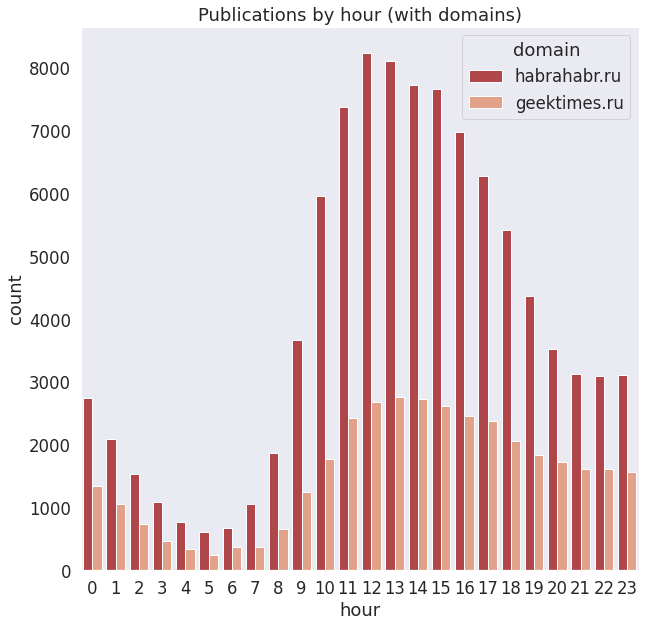

In [16]:
plt.subplots(figsize=(10, 10))
hour_to_domain_plot = sns.countplot(x = "hour", hue = "domain", data = df)
hour_to_domain_plot.set_title("Publications by hour (with domains)")

hour
0     17546.982349
1     17717.709114
2     17328.690581
3     18370.017972
4     20678.389091
5     17218.894242
6     21354.310115
7     19093.953408
8     16014.419048
9     16906.059099
10    16580.889909
11    16331.186818
12    16209.416141
13    15822.606055
14    15773.203785
15    14739.224017
16    16583.150731
17    15814.881313
18    16731.210843
19    16926.284287
20    18134.614873
21    17605.819064
22    18365.387460
23    17631.345932
Name: views, dtype: float64
hour
6     21354.310115
4     20678.389091
7     19093.953408
3     18370.017972
22    18365.387460
Name: views, dtype: float64


<AxesSubplot:title={'center':'Views by hour'}, xlabel='hour'>

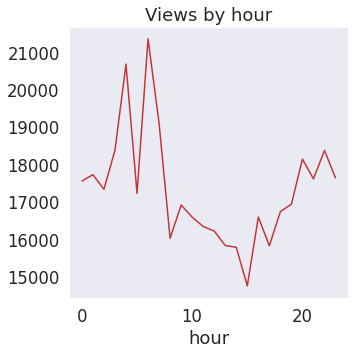

In [25]:
plt.subplots(figsize=(5, 5))
print(df.groupby("hour")["views"].mean())
print(df.groupby("hour")["views"].mean().sort_values(ascending=False)[:5])
df.groupby("hour")["views"].mean().plot(title="Views by hour")

hour
4    53.657273
3    53.123877
6    51.799618
1    49.417910
2    48.827025
Name: comments, dtype: float64


<AxesSubplot:title={'center':'Comments by hour'}, xlabel='hour'>

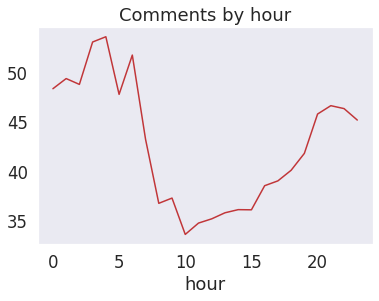

In [18]:
print(df.groupby("hour")["comments"].mean().sort_values(ascending=False)[:5])
df.groupby("hour")["comments"].mean().plot(title="Comments by hour")

<AxesSubplot:title={'center':'Comments per hour on habr'}, xlabel='hour'>

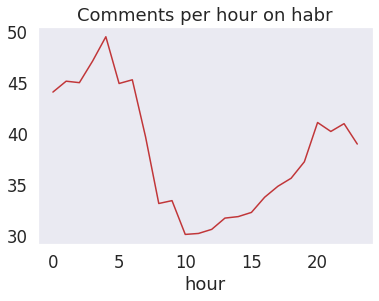

In [19]:
df[df.domain == "habrahabr.ru"].groupby("hour")["comments"].mean().plot(title="Comments per hour on habr")

<AxesSubplot:title={'center':'Maximum comments per hour on geektimes'}, xlabel='hour'>

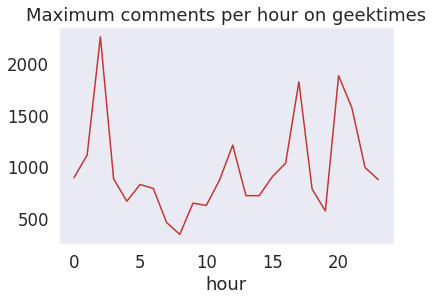

In [20]:
df[df.domain == "geektimes.ru"].groupby("hour")["comments"].max().plot(title="Maximum comments per hour on geektimes")

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* **@Mithgol**
* @alizar
* @ilya42

In [21]:
df[df.author.isin(["@Mordatyj", "@Mithgol", "@alizar", "@ilya42"])].groupby("author")[["votes_minus"]].mean().sort_values("votes_minus", ascending=False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? - Нет, по понедельникам статьи выходят в основном днём, а по субботам - днём или вечером

Text(0.5, 1.0, 'Number of publications by hour\n(Mon vs Sat)')

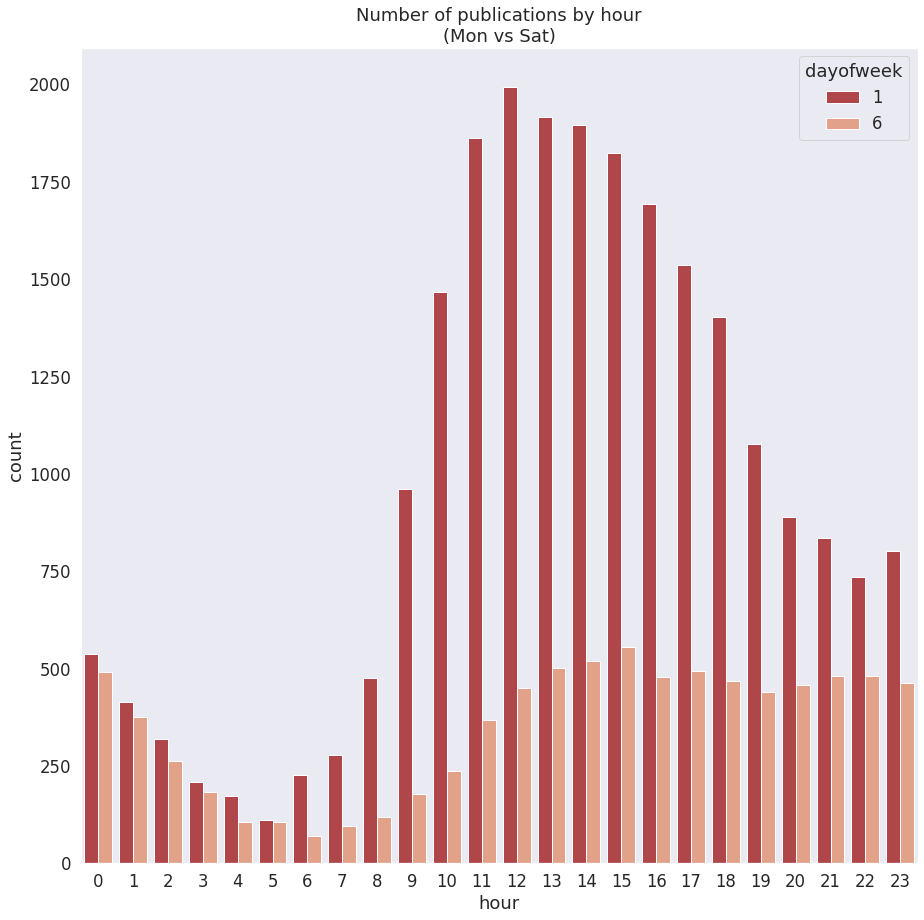

In [22]:
plt.subplots(figsize=(15, 15))
sat_vs_mon = sns.countplot(x = "hour", hue="dayofweek", data = df[df.dayofweek.isin([1, 6])])
sat_vs_mon.set_title("Number of publications by hour\n(Mon vs Sat)")